## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [65]:
# 데이터 분석 필수 라이브러리 4종 세트 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
trans=pd.read_csv("transcript.csv").drop(columns=["Unnamed: 0"])
pro=pd.read_csv("profile.csv").drop(columns=["Unnamed: 0"])
port=pd.read_csv("portfolio.csv").drop(columns=["Unnamed: 0"])

### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [67]:
# 각 데이터에 결측치가 있는지 확인합니다.
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [68]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [69]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [70]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
nulls=pro[pro.isnull().any(axis=1)]
nulls.age.value_counts()

118    2175
Name: age, dtype: int64

In [71]:
# 결측치를 처리해줍니다. # 평균과 같은 통계량으로 채워주거나, 버립니다.
pro.dropna(inplace=True)

### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.

In [72]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
pro.became_member_on = pd.to_datetime(pro.became_member_on.astype(str), format='%Y%m%d')
pro

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


In [73]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


#### 성별에 관한 분석

In [74]:
pro.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

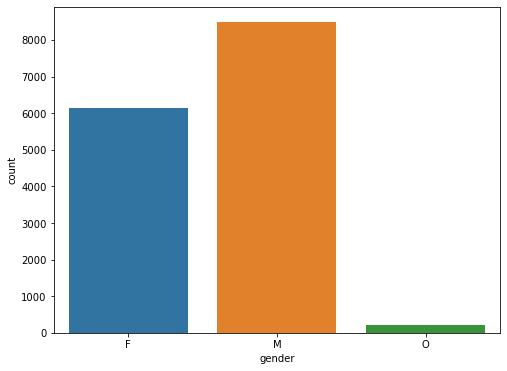

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(data=pro,x="gender")
plt.show

In [76]:
pd.pivot_table(data=pro,index="gender",values="income")

,income
gender,
F,71306.412139
M,61194.601603
O,63287.735849


#### 나이에 대한 분석

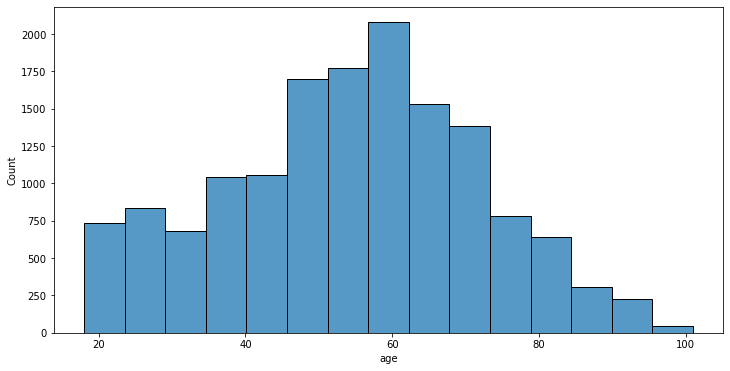

In [77]:
plt.figure(figsize=(12,6))
sns.histplot(data=pro,x="age",bins=15)
plt.show()

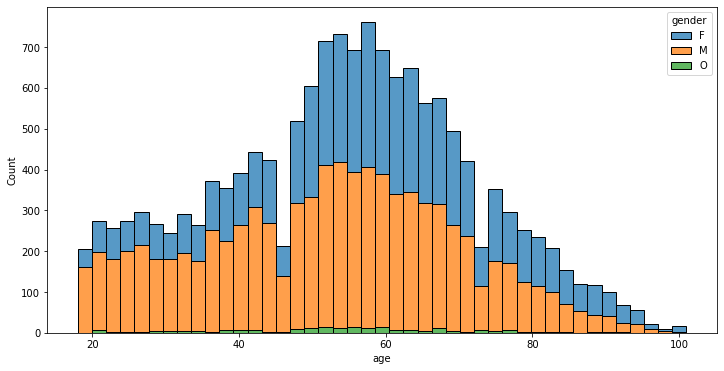

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(data=pro,x="age",hue="gender",multiple="stack")
plt.show()

In [79]:
pd.pivot_table(data=pro,index="gender",values=["age","income"])

,age,income
gender,,
F,57.544950,71306.412139
M,52.116690,61194.601603
O,54.400943,63287.735849


#### 회원이 된 날짜에 대한 분석

In [80]:
pro["join_year"]=pro.became_member_on.dt.year
pro["join_month"]=pro.became_member_on.dt.month
pro

,gender,age,id,became_member_on,income,join_year,join_month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018,6
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018,7
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017,1
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016,3


<function matplotlib.pyplot.show(close=None, block=None)>

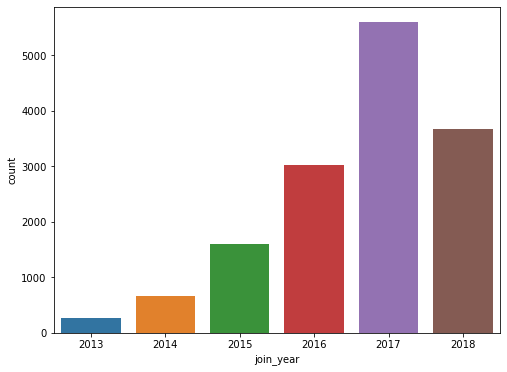

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(data=pro,x="join_year")
plt.show

In [82]:
x=pro.join_month.value_counts().index
y=pro.join_month.value_counts().values

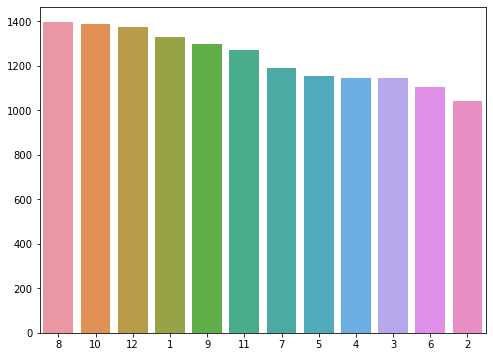

In [83]:
plt.figure(figsize=(8,6))
sns.barplot(x=x,y=y,order=x)
plt.show()

#### 수입에 대한 분석

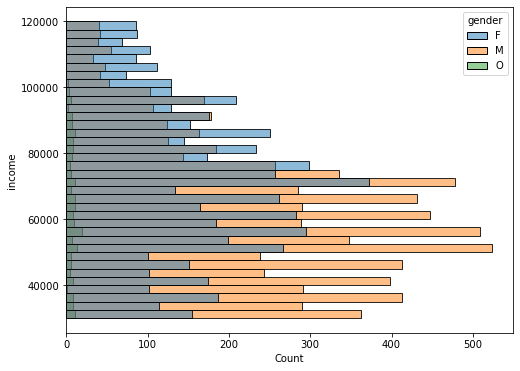

In [84]:
plt.figure(figsize=(8,6))
sns.histplot(data=pro,y="income",hue="gender")
plt.show()

#### profile 데이터에 대한 상관관계 분석

<function matplotlib.pyplot.show(close=None, block=None)>

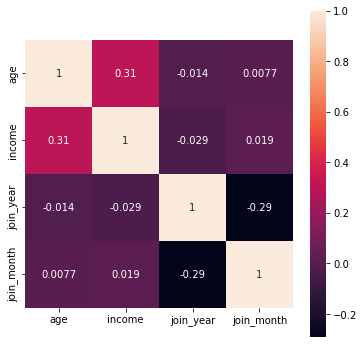

In [85]:
plt.figure(figsize=(6,6))
sns.heatmap(data=pro.corr(),square=True,annot=True)
plt.show

### 4. transcript에 대한 분석

- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.


- `person`과 `values` column은 분석 대상에서 제외합니다.


> values에 대한 패턴이 궁금하다면, 아래 코드를 참고해보세요 ! (배우지 않은 내용이 있어, 어려울 수 있습니다)

#### event에 대한 분석

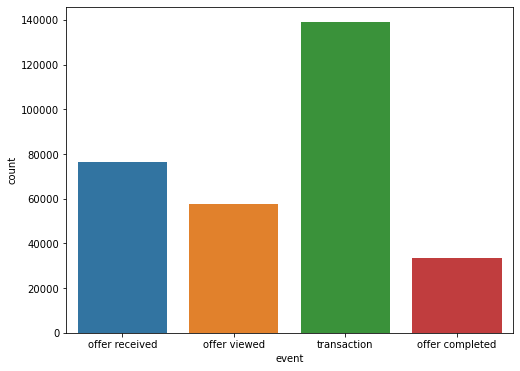

In [87]:
plt.figure(figsize=(8,6))
sns.countplot(data=trans,x="event")
plt.show()

In [90]:
pd.pivot_table(data=trans,index="event",values="time")

,time
event,
offer completed,401.052801
offer received,332.579519
offer viewed,354.290515
transaction,381.584334


#### time에 대한 분석

In [99]:
temp = sorted(trans.time.value_counts()[:6].index)
print(temp)
for i in range(len(temp)-1):
    print(temp[i+1]-temp[i],end=" ")
    

[0, 168, 336, 408, 504, 576]
168 168 72 96 72 

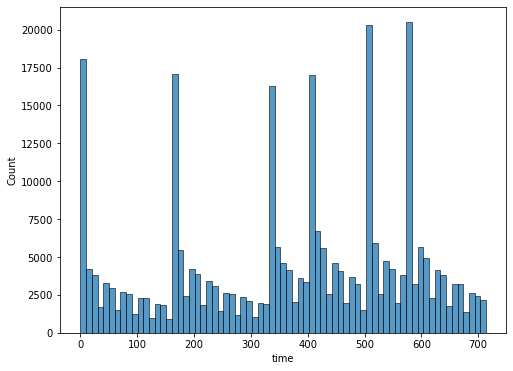

In [100]:
plt.figure(figsize=(8,6))
sns.histplot(data=trans,x="time")
plt.show()

In [101]:
temp_df=trans.loc[trans.time.isin(temp), :]
temp_df

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
262132,08eb126ad33f447ca3ad076482445c05,transaction,{'amount': 16.93},576
262133,1b4df4b48bf64727a4c445909aea1251,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},576
262134,ff737c250d2343729ade04c4f6eb1001,transaction,{'amount': 4.78},576
262135,400d0536e8794cbb855b0d882d67cbda,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576


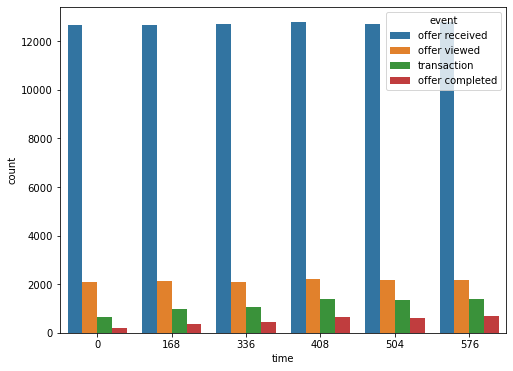

In [104]:
plt.figure(figsize=(8,6))
sns.countplot(data=temp_df,x="time",hue="event")
plt.show()

#### (Advanced, optional) value에 대한 분석 

In [105]:
# str로 되어있는 데이터를 dictionary로 변환
trans.value = trans.value.apply(lambda x:eval(x))
trans

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [106]:
list(trans.value[0].keys())[0]

'offer id'

In [107]:
# event에 따른 value의 차이 확인
trans["value_key"] = trans.value.apply(lambda x:list(x.keys())[0])
trans["value_value"] = trans.value.apply(lambda x:list(x.values())[0])
trans

,person,event,value,time,value_key,value_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3.53


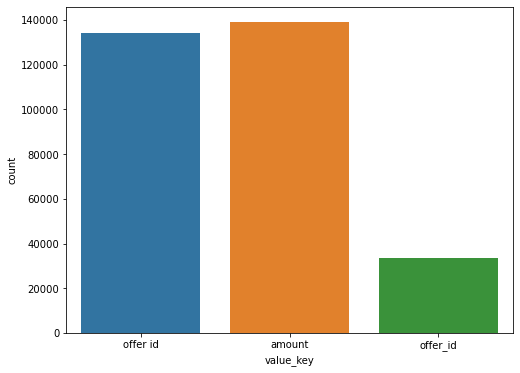

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(data=trans, x="value_key")
plt.show()

In [109]:
trans.value_value.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
                                    ...  
635.06                                  1
42.51                                   1
124.03                                  1
40.49                                   1
476.33                                  1
Name: value_value, Length: 5113, dtype: int64

In [110]:
temp = trans.loc[trans.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

,id
0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2906b810c7d4411798c6938adc9daaa5
3,fafdcd668e3743c1bb461111dcafc2a4
4,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2
167577,fafdcd668e3743c1bb461111dcafc2a4
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7
167579,fafdcd668e3743c1bb461111dcafc2a4


In [111]:
temp.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
9b98b8c7a33c4b65b9aebfe6a799e6d9    16202
2906b810c7d4411798c6938adc9daaa5    15767
5a8bc65990b245e5a138643cd4eb9837    14305
0b1e1539f2cc45b7b9fa7c272da2e1d7    13751
3f207df678b143eea3cee63160fa8bed    11761
Name: value_value, dtype: int64

In [112]:
temp_port = pd.merge(temp_df, port, how="left", on="id")
temp_port

,id,reward,channels,difficulty,duration,offer_type
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"['web', 'email', 'mobile']",5,7,bogo
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount
2,2906b810c7d4411798c6938adc9daaa5,2,"['web', 'email', 'mobile']",10,7,discount
3,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"['web', 'email', 'mobile', 'social']",7,7,discount
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount


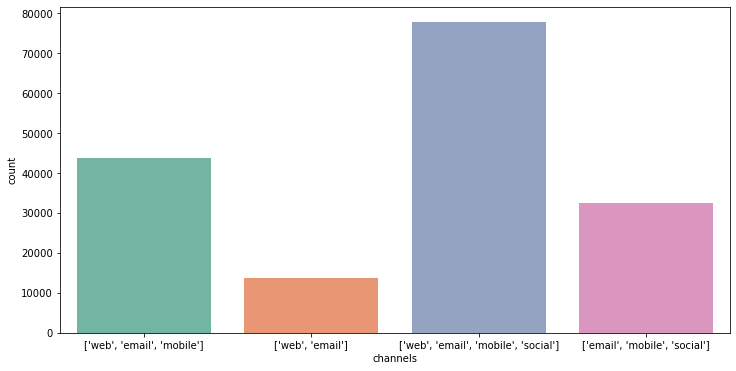

In [113]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_port, x="channels", palette="Set2")
plt.show()